# Finding Duplicated Images & Near Duplicates

SentenceTransformers provides models that allow to embed images and text into the same vector space. This allows to find similar images as similar images or texts are projected into the same vector space.




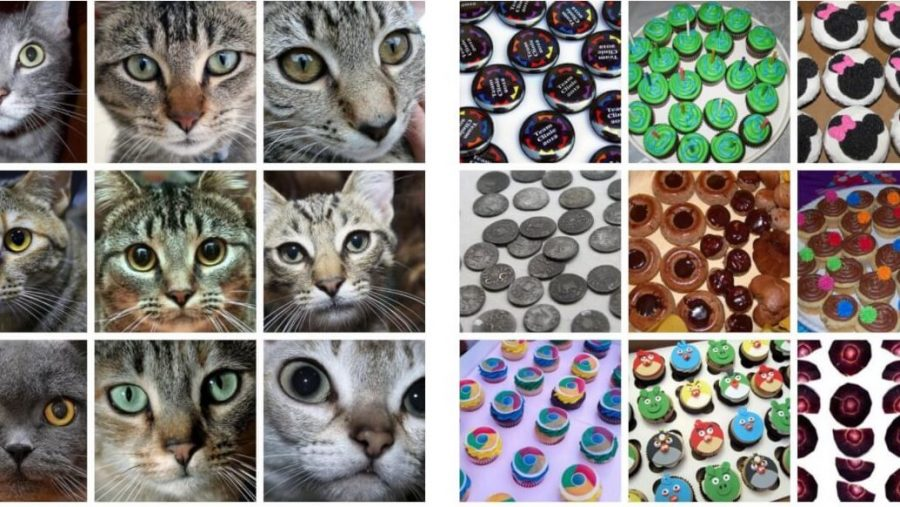

we use the OpenAI CLIP Model, which was trained on a large set of images and image alt texts.

https://github.com/openai/CLIP

we use the Unsplash Dataset Lite, which contains about 25k images.

https://unsplash.com/data

https://github.com/unsplash/datasets

http://sbert.net/datasets/

https://public.ukp.informatik.tu-darmstadt.de/reimers/sentence-transformers/datasets/unsplash-25k-photos.zip

In [1]:
%pip install sentence_transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 2.9 MB/s 
     |████████████████████████████████| 5.8 MB 10.7 MB/s 
     |████████████████████████████████| 1.3 MB 67.2 MB/s 
     |████████████████████████████████| 182 kB 77.5 MB/s 
     |████████████████████████████████| 7.6 MB 70.7 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=7eb9b8cbdd4d7c1307a03360b7b97fe2711a8e1dc10c222ff0c64ca955b41031
  Stored in directory: /root/.cache/pip/wheels/5e/6f/8c/d88aec621f3f542d26fac0342bef5e693335d125f4e54aeffe
Successfully built sentence-transformers


In [2]:
from sentence_transformers import SentenceTransformer, util
from PIL import Image
import matplotlib.pyplot as plt
import glob
import torch
import os

In [3]:
!wget https://public.ukp.informatik.tu-darmstadt.de/reimers/sentence-transformers/datasets/unsplash-25k-photos.zip

--2022-12-26 15:06:33--  https://public.ukp.informatik.tu-darmstadt.de/reimers/sentence-transformers/datasets/unsplash-25k-photos.zip
Resolving public.ukp.informatik.tu-darmstadt.de (public.ukp.informatik.tu-darmstadt.de)... 130.83.167.186
Connecting to public.ukp.informatik.tu-darmstadt.de (public.ukp.informatik.tu-darmstadt.de)|130.83.167.186|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1922426838 (1.8G) [application/zip]
Saving to: ‘unsplash-25k-photos.zip’

unsplash-25k-photos 100%[===================>]   1.79G  7.53MB/s    in 86s     

2022-12-26 15:08:00 (21.3 MB/s) - ‘unsplash-25k-photos.zip’ saved [1922426838/1922426838]



In [4]:
!unzip 'unsplash-25k-photos.zip' -d 'photos'

Streaming output truncated to the last 5000 lines.
  inflating: photos/ErnD0oSB9OE.jpg  
  inflating: photos/CLMlVwtPsI4.jpg  
  inflating: photos/7by0hnrUBP8.jpg  
  inflating: photos/XWARm1Wgg4U.jpg  
  inflating: photos/m_x26CPIjic.jpg  
  inflating: photos/Or9vxPAGtXw.jpg  
  inflating: photos/asr62h5w66w.jpg  
  inflating: photos/oPubZ53L5OE.jpg  
  inflating: photos/AENmGl9JVgs.jpg  
  inflating: photos/kR1Aer8c_WI.jpg  
  inflating: photos/YCniL3n_B7Q.jpg  
  inflating: photos/pg5CVv0FEBU.jpg  
  inflating: photos/jynDaAkI0H8.jpg  
  inflating: photos/QP64OlGcfcQ.jpg  
  inflating: photos/a_nu2fRoqwI.jpg  
  inflating: photos/HeerZLfH4h8.jpg  
  inflating: photos/7TGVEgcTKlY.jpg  
  inflating: photos/fN2pzLWtG6A.jpg  
  inflating: photos/lpxXl5Ssung.jpg  
  inflating: photos/yan5Aj6crIU.jpg  
  inflating: photos/9Phn7Dwz2PM.jpg  
  inflating: photos/9TRaDtl7Z5U.jpg  
  inflating: photos/QeZuoNqtj9I.jpg  
  inflating: photos/lLUbQBbf6Bc.jpg  
  inflating: photos/rmFs3k34JLI.jpg  

In [5]:
img_names = list(glob.glob('photos/*.jpg'))[:2000]
print(len(img_names))

2000


In [6]:
model = SentenceTransformer('clip-ViT-B-32')
img_embed = model.encode([Image.open(img) for img in img_names], batch_size=32, convert_to_tensor=True)

Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.03k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/525k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/316 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/605M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/389 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/604 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/961k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.88k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

In [7]:
duplicates = util.paraphrase_mining_embeddings(img_embed, top_k=5)

In [9]:
len(duplicates)

8063

In [11]:
duplicates[:10]

[[0.9751293659210205, 1819, 1926],
 [0.9736667275428772, 220, 1753],
 [0.9728944897651672, 1600, 1746],
 [0.9701833128929138, 815, 1381],
 [0.9679183959960938, 200, 312],
 [0.9668912291526794, 384, 1637],
 [0.9668638110160828, 312, 377],
 [0.9665938019752502, 836, 915],
 [0.9664596319198608, 408, 1043],
 [0.9660785794258118, 471, 1646]]

0.9751293659210205


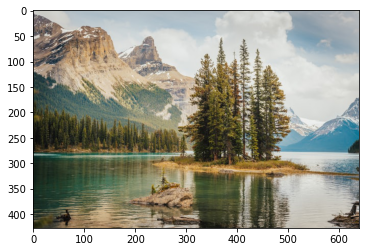

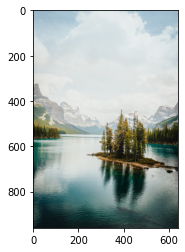

-------------------------------



0.9736667275428772


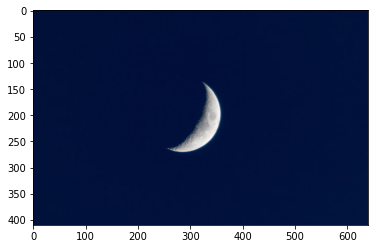

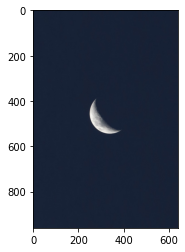

-------------------------------



0.9728944897651672


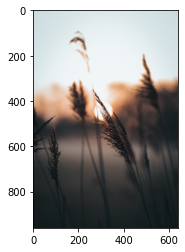

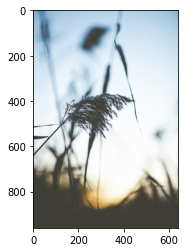

-------------------------------



0.9701833128929138


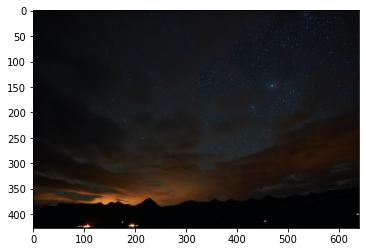

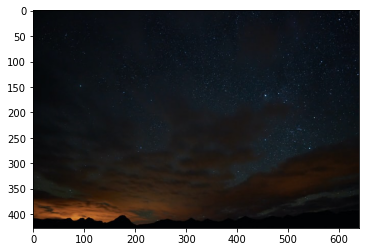

-------------------------------



0.9679183959960938


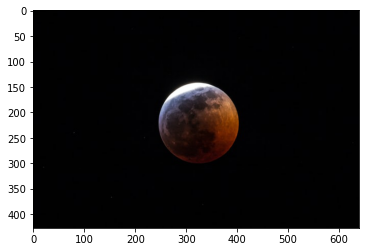

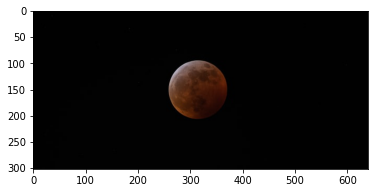

-------------------------------



0.9668912291526794


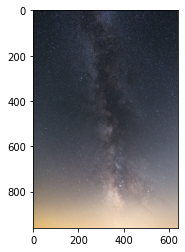

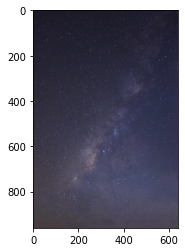

-------------------------------



0.9668638110160828


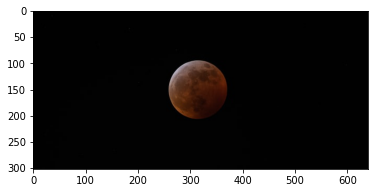

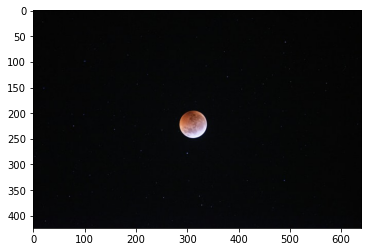

-------------------------------



0.9665938019752502


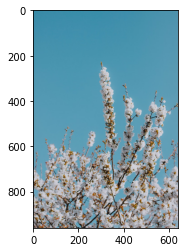

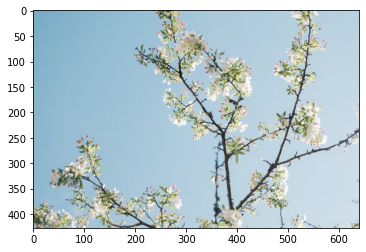

-------------------------------



0.9664596319198608


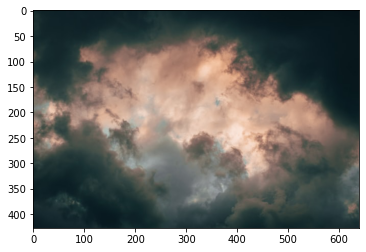

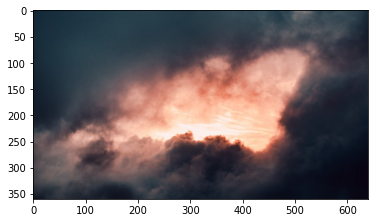

-------------------------------



0.9660785794258118


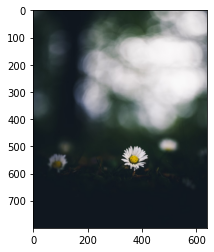

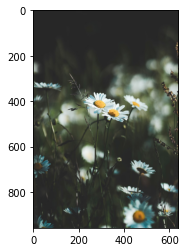

-------------------------------





In [12]:
for score, idx1, idx2 in duplicates[0:10]:
  print(score)
  img_path = img_names[idx1]
  im = Image.open(img_path)
  plt.figure()
  plt.imshow(im)
  plt.show()

  img_path = img_names[idx2]
  im = Image.open(img_path)
  plt.figure()
  plt.imshow(im)
  plt.show()

  print("-------------------------------\n\n\n")

